In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IPL_Matches_2022.csv')
df.head()

,ID,City,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,29-05-2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,Wickets,7,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings,Wickets,5,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


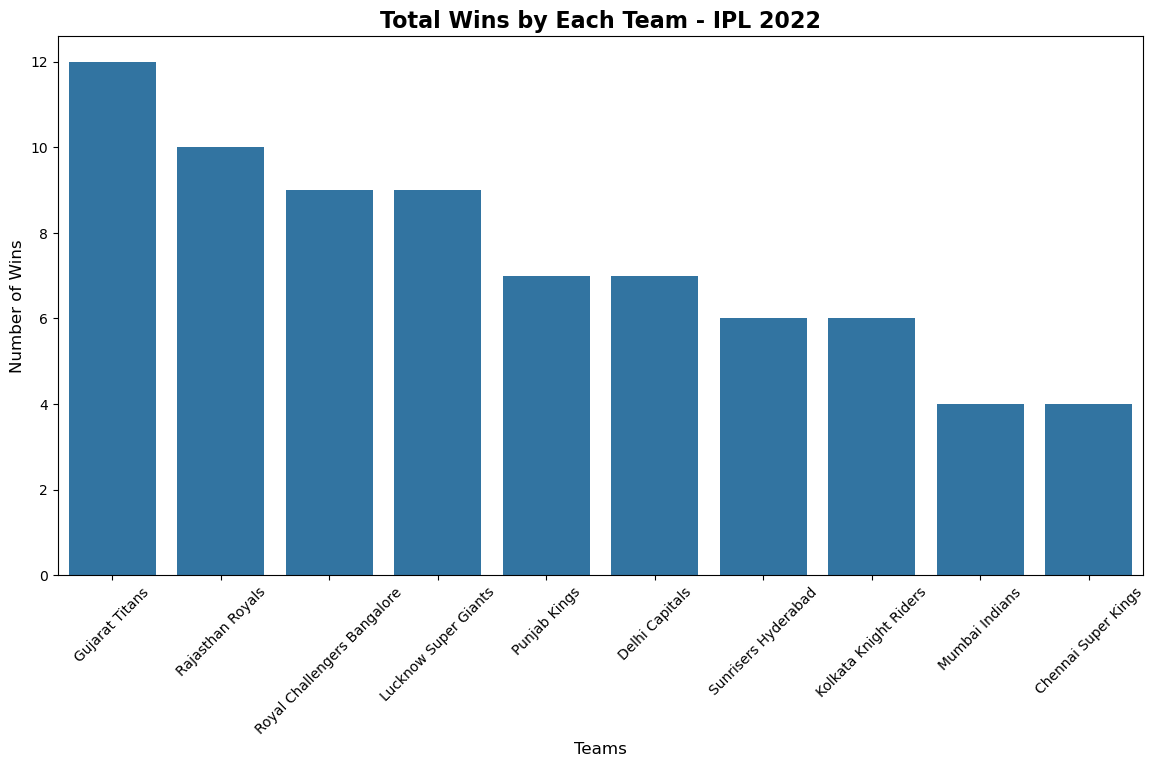

In [3]:
plt.figure(figsize=(14,7))
team_wins = df['WinningTeam'].value_counts()

sns.barplot(x=team_wins.index, y=team_wins.values)

plt.title("Total Wins by Each Team - IPL 2022", fontsize=16, fontweight='bold')
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(rotation=45)
plt.show()

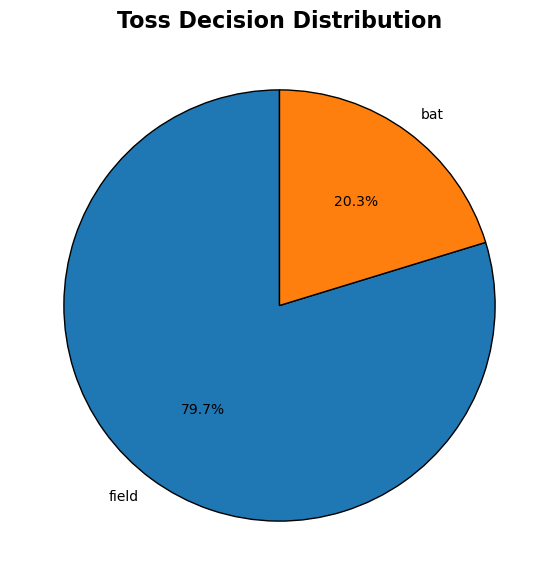

In [4]:
plt.figure(figsize=(7,7))
df['TossDecision'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Toss Decision Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")
plt.show()

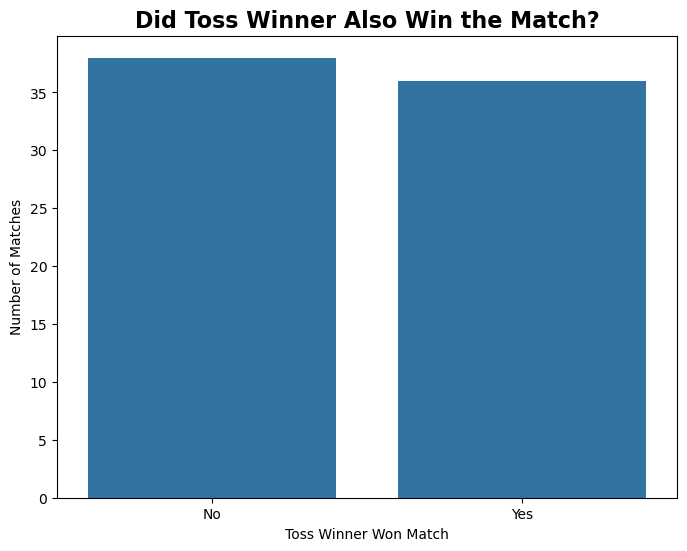

In [5]:
plt.figure(figsize=(8,6))

df['TossWinMatchWin'] = df['TossWinner'] == df['WinningTeam']

sns.countplot(x=df['TossWinMatchWin'])

plt.title("Did Toss Winner Also Win the Match?", fontsize=16, fontweight='bold')
plt.xlabel("Toss Winner Won Match")
plt.ylabel("Number of Matches")
plt.xticks([0,1], ['No','Yes'])
plt.show()

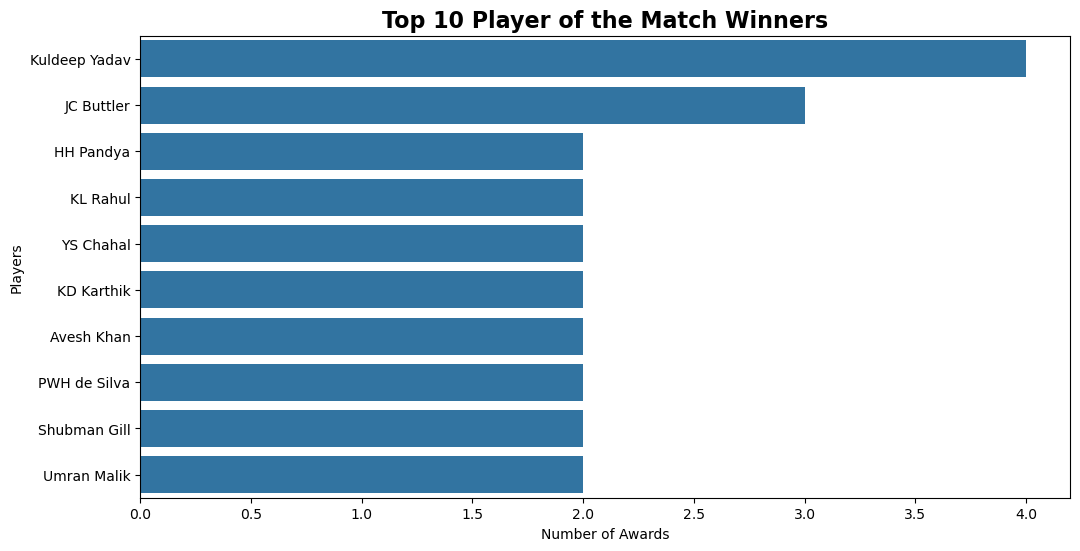

In [6]:
plt.figure(figsize=(12,6))

top_players = df['Player_of_Match'].value_counts().head(10)

sns.barplot(x=top_players.values, y=top_players.index)

plt.title("Top 10 Player of the Match Winners", fontsize=16, fontweight='bold')
plt.xlabel("Number of Awards")
plt.ylabel("Players")
plt.show()

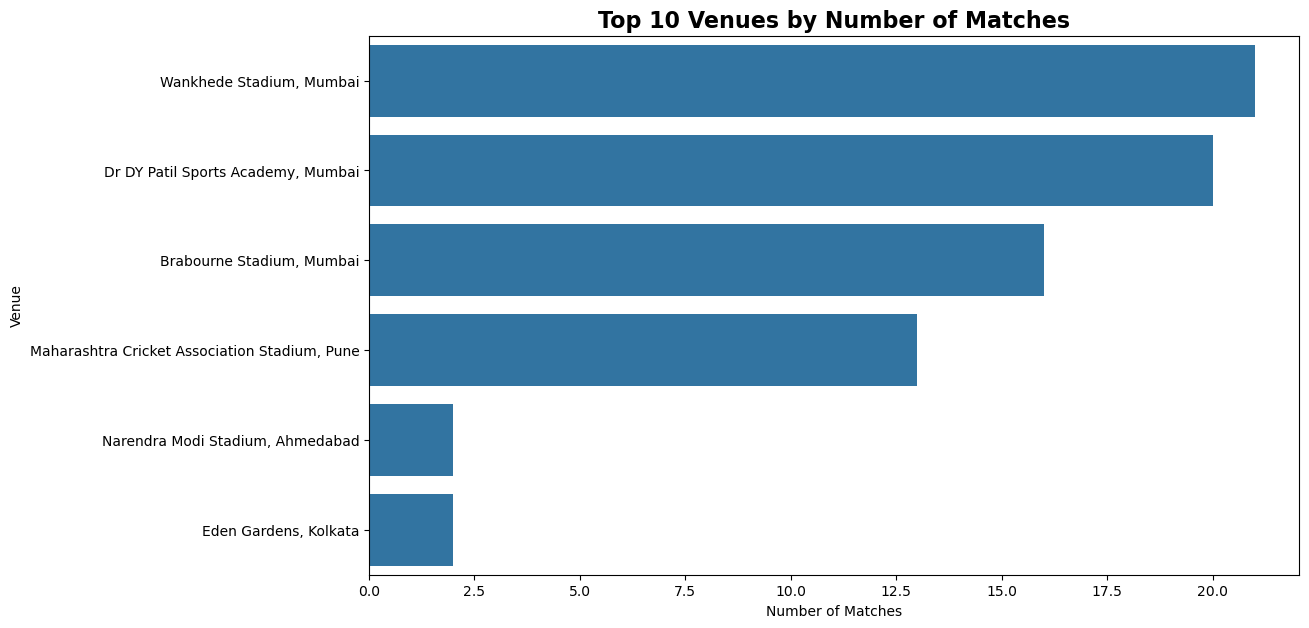

In [7]:
plt.figure(figsize=(12,7))

venue_counts = df['Venue'].value_counts().head(10)

sns.barplot(x=venue_counts.values, y=venue_counts.index)

plt.title("Top 10 Venues by Number of Matches", fontsize=16, fontweight='bold')
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()

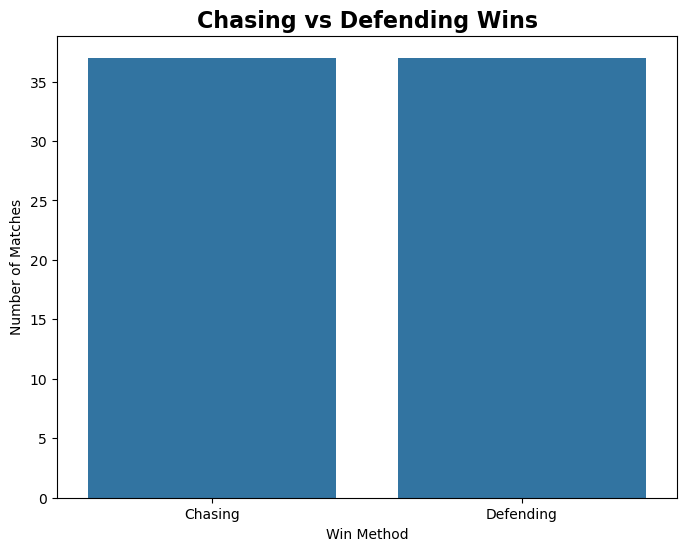

In [8]:
plt.figure(figsize=(8,6))

df['WinMethod'] = df['WonBy'].apply(lambda x: 'Chasing' if x=='Wickets' else 'Defending')

sns.countplot(x=df['WinMethod'])

plt.title("Chasing vs Defending Wins", fontsize=16, fontweight='bold')
plt.xlabel("Win Method")
plt.ylabel("Number of Matches")
plt.show()

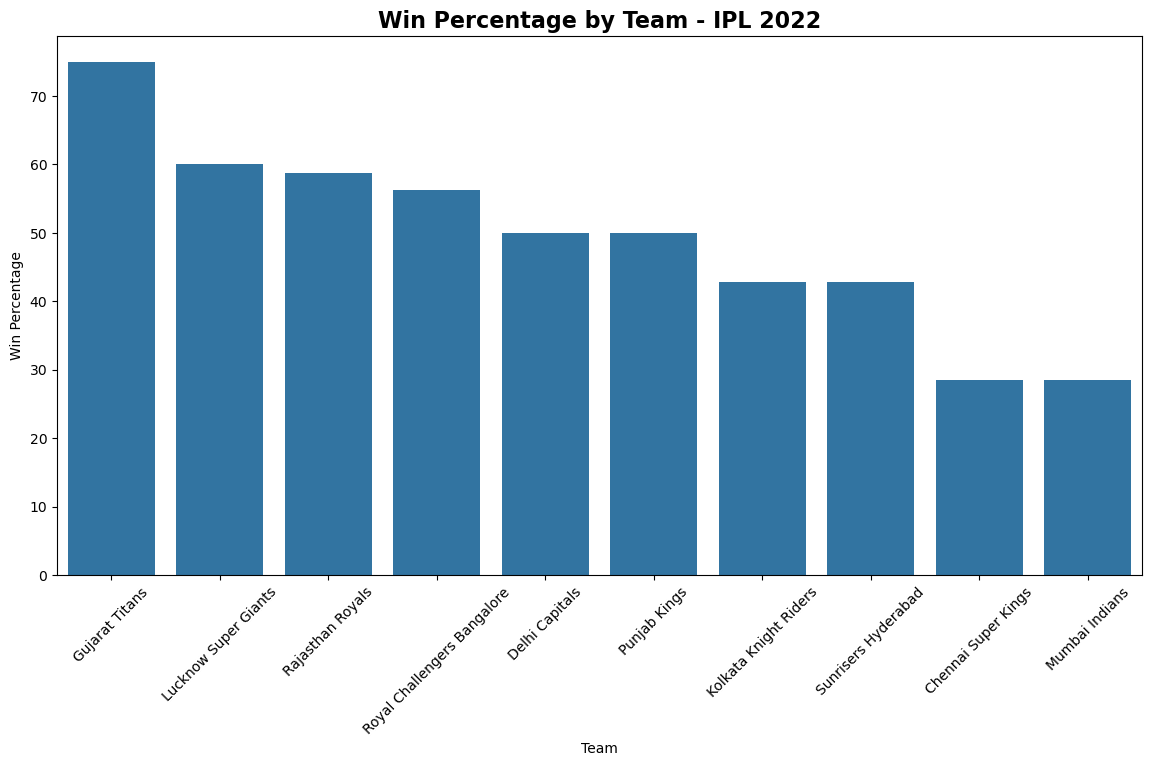

In [9]:
team1 = df['Team1'].value_counts()
team2 = df['Team2'].value_counts()

matches = team1.add(team2, fill_value=0)

wins = df['WinningTeam'].value_counts()

stats = pd.DataFrame({
    'Matches': matches,
    'Wins': wins
}).fillna(0)

stats['Win %'] = (stats['Wins'] / stats['Matches']) * 100
stats = stats.sort_values('Win %', ascending=False)

plt.figure(figsize=(14,7))

sns.barplot(x=stats.index, y=stats['Win %'])

plt.title("Win Percentage by Team - IPL 2022", fontsize=16, fontweight='bold')
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.xticks(rotation=45)
plt.show()

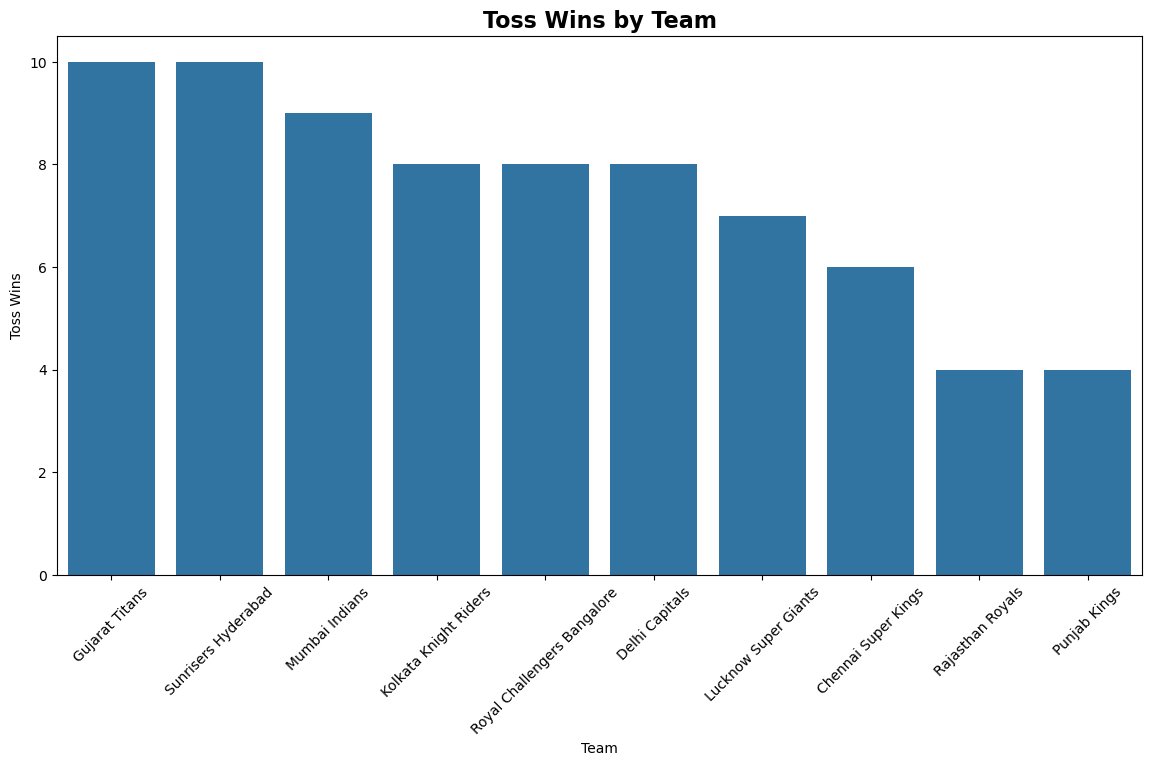

In [10]:
plt.figure(figsize=(14,7))

toss_wins = df['TossWinner'].value_counts()

sns.barplot(x=toss_wins.index, y=toss_wins.values)

plt.title("Toss Wins by Team", fontsize=16, fontweight='bold')
plt.xlabel("Team")
plt.ylabel("Toss Wins")
plt.xticks(rotation=45)
plt.show()

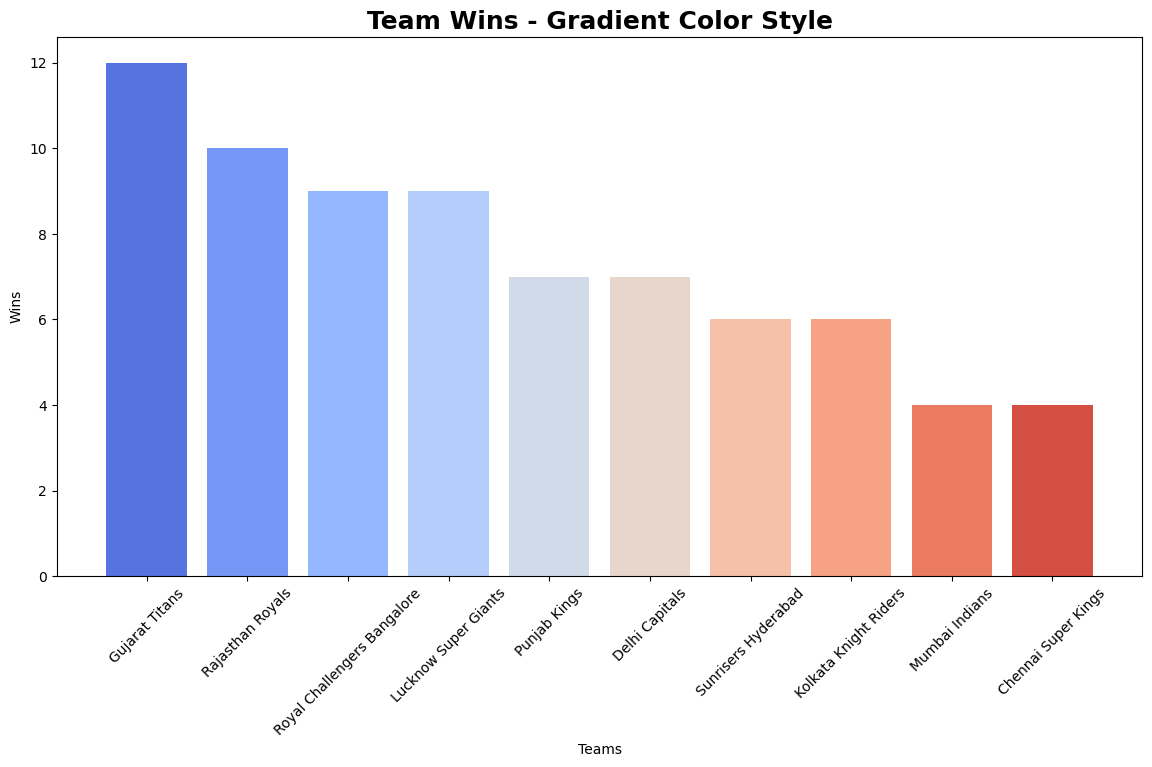

In [11]:
plt.figure(figsize=(14,7))

team_wins = df['WinningTeam'].value_counts()

colors = sns.color_palette("coolwarm", len(team_wins))

plt.bar(team_wins.index, team_wins.values, color=colors)

plt.title("Team Wins - Gradient Color Style", fontsize=18, fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11408\1207308341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette=colors)


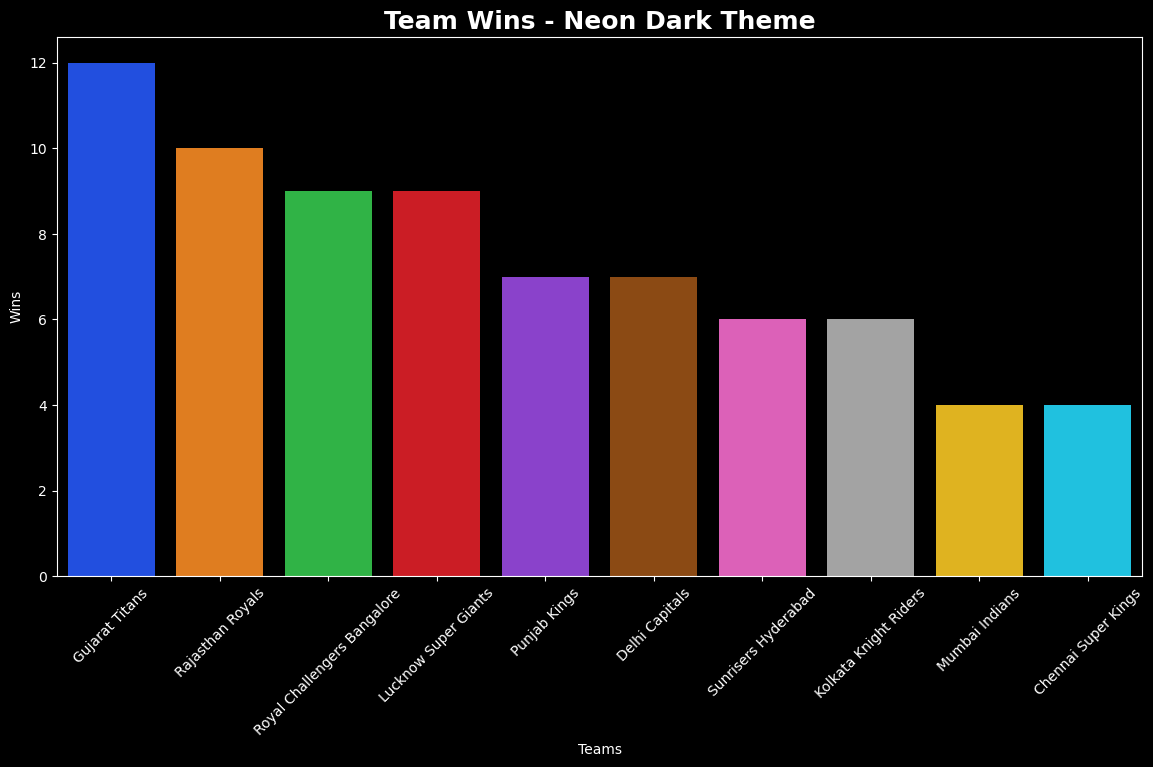

In [12]:
plt.style.use("dark_background")

plt.figure(figsize=(14,7))

colors = sns.color_palette("bright")

sns.barplot(x=team_wins.index, y=team_wins.values, palette=colors)

plt.title("Team Wins - Neon Dark Theme", fontsize=18, fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11408\3414267526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


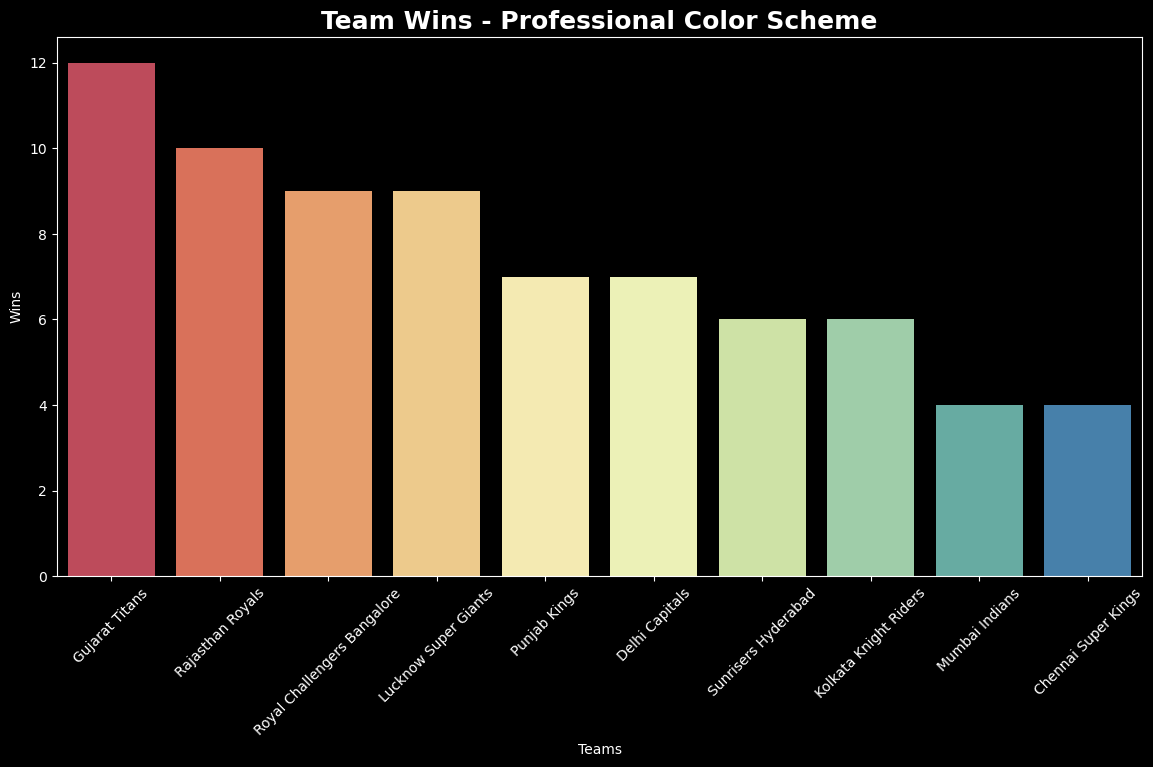

In [13]:
plt.figure(figsize=(14,7))

sns.barplot(
    x=team_wins.index,
    y=team_wins.values,
    palette="Spectral"
)

plt.title("Team Wins - Professional Color Scheme", fontsize=18, fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)

plt.show()

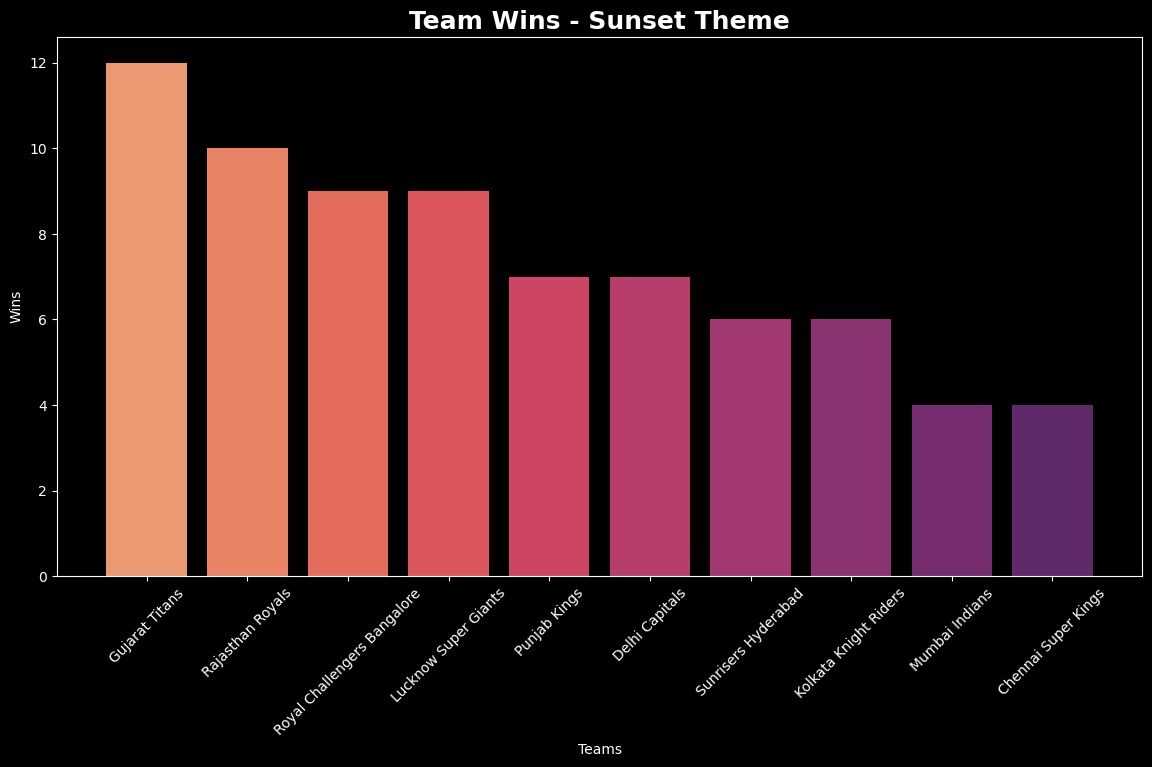

In [14]:
plt.figure(figsize=(14,7))

colors = sns.color_palette("flare", len(team_wins))

plt.bar(team_wins.index, team_wins.values, color=colors)

plt.title("Team Wins - Sunset Theme", fontsize=18, fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Wins")

plt.xticks(rotation=45)

plt.show()

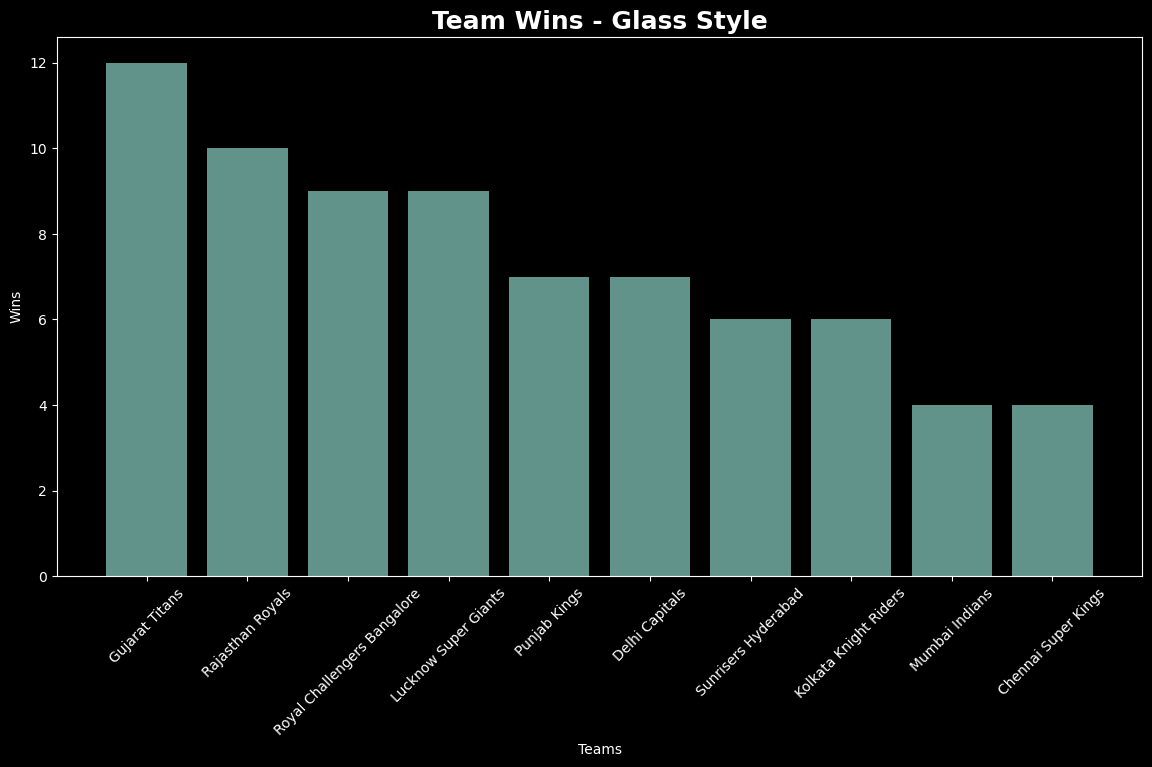

In [15]:
plt.figure(figsize=(14,7))

bars = plt.bar(team_wins.index, team_wins.values)

for bar in bars:
    bar.set_alpha(0.7)

plt.title("Team Wins - Glass Style", fontsize=18, fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Wins")

plt.xticks(rotation=45)

plt.show()

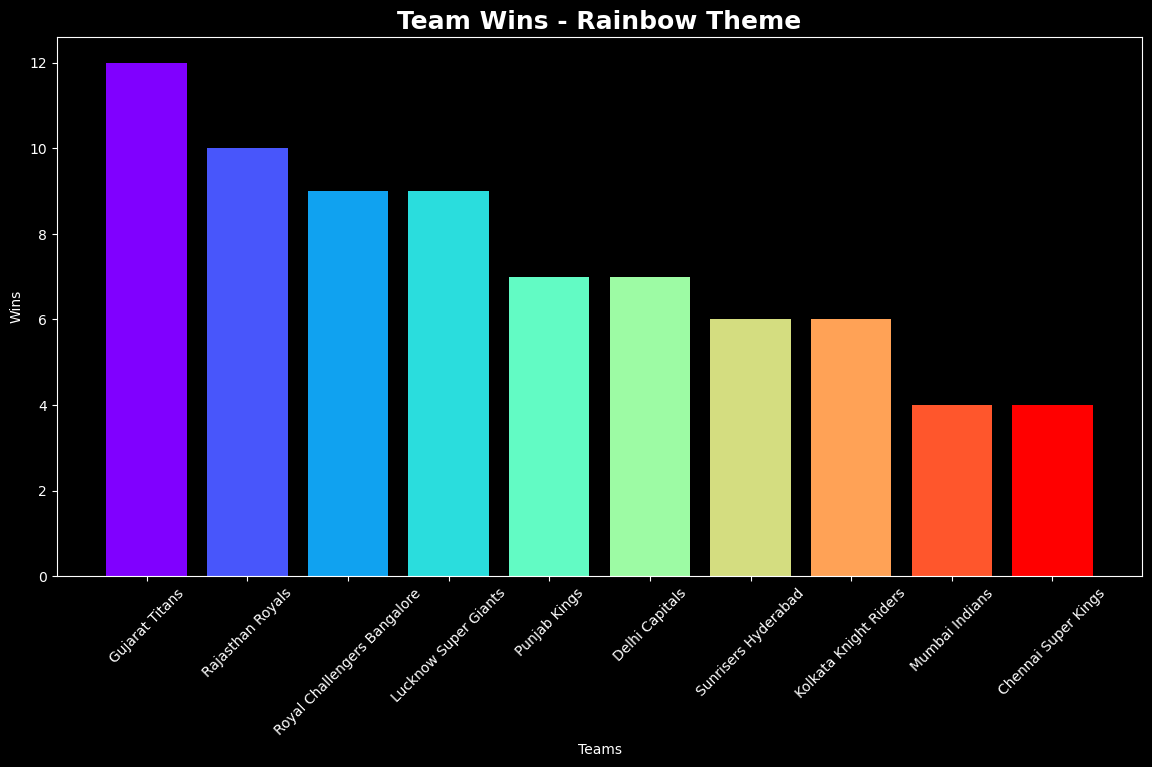

In [16]:
plt.figure(figsize=(14,7))

colors = plt.cm.rainbow(np.linspace(0,1,len(team_wins)))

plt.bar(team_wins.index, team_wins.values, color=colors)

plt.title("Team Wins - Rainbow Theme", fontsize=18, fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Wins")

plt.xticks(rotation=45)

plt.show()